# 准备

In [16]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import tempfile

pd.set_option('display.mpl_style', 'default')
# Always display all the columns
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60) 

def readdata(filename):
    A=pd.read_excel(filename)
    B = pd.DataFrame()
    B['x'] = A.iloc[:,1]
    return B

# Shewhart 控制图

In [17]:
def Shewhart(B):
    x = B["x"]
    xbar = x.mean() ## mean value
    B['xbar']= xbar
    xstd = x.std()
    u = 3
    UCL_x= xbar + u * xstd     ## upper control limit of range
    B['UCL_x'] = UCL_x
    LCL_x= xbar - u * xstd         ## lower control limit of range 
    B['LCL_x'] = LCL_x
    B["x"].plot(marker="o", figsize=(15, 6))
    B["UCL_x"].plot(color='b')
    B["LCL_x"].plot(color='b')
    B["xbar"].plot(color='r')
    plt.title(r'Shewhart  3$\sigma$')
    figname=tempfile.mkdtemp() + '_shewhart.jpg'
    plt.savefig(figname)
    return figname

# EWMA控制图

In [18]:
def EWMA(B):
    s = 2
    B['ewma_x'] = B['x'].ewm(span=s).mean()
    x = B['ewma_x']
    xbar = x.mean() ## mean value
    B['ewma_xbar']= xbar
    xstd = x.std()
    u = 3
    UCL_x= xbar + u * xstd     ## upper control limit of range
    B['ewma_UCL_x'] = UCL_x
    LCL_x= xbar - u * xstd         ## lower control limit of range 
    B['ewma_LCL_x'] = LCL_x
    B["ewma_x"].plot(marker="o", figsize=(15, 6))
    B["ewma_UCL_x"].plot(color='b')
    B["ewma_LCL_x"].plot(color='b')
    B["ewma_xbar"].plot(color='r')
    plt.title(r'EWMA  3$\sigma$')
    figname=tempfile.mkdtemp() + '_ewma.jpg'
    plt.savefig(figname)
    return figname

# CUSUM控制图

In [19]:
def CUSUM(B):
    B['cusum_x'] = (B['x'] - B['x'].mean()).cumsum()
    x = B['cusum_x']
    xbar = x.mean() ## mean value
    B['cusum_xbar']= xbar
    xstd = x.std()
    u = 3
    UCL_x= xbar + u * xstd     ## upper control limit of range
    B['cusum_UCL_x'] = UCL_x
    LCL_x= xbar - u * xstd         ## lower control limit of range 
    B['cusum_LCL_x'] = LCL_x
    B["cusum_x"].plot(marker="o", figsize=(15, 6))
    B["cusum_UCL_x"].plot(color='b')
    B["cusum_LCL_x"].plot(color='b')
    B["cusum_xbar"].plot(color='r')
    plt.title(r'CUSUM  3$\sigma$')
    figname=tempfile.mkdtemp() + '_ewma.jpg'
    plt.savefig(figname)
    return figname

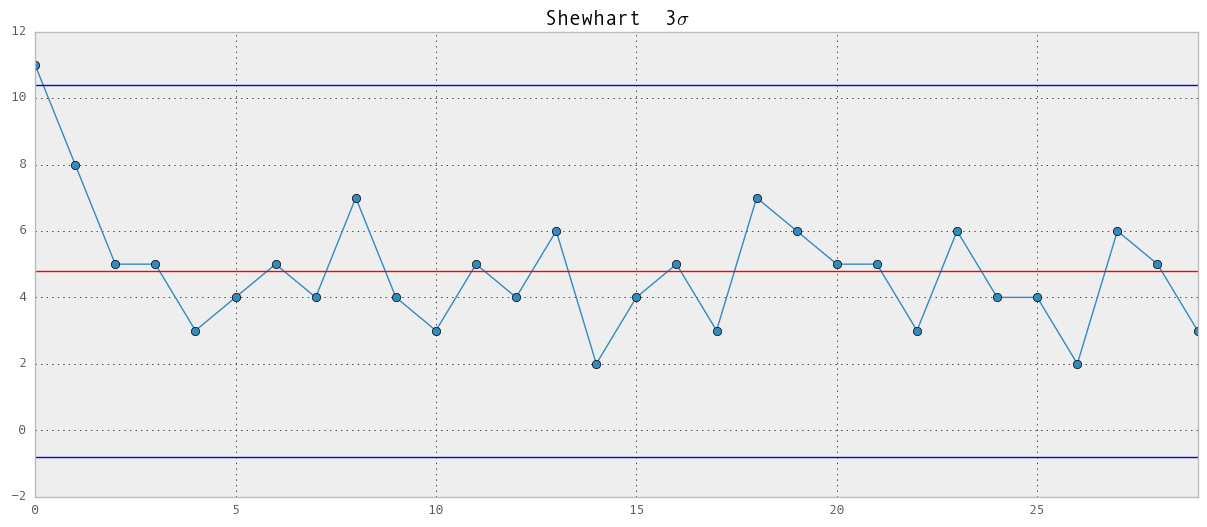

In [20]:
if __name__ =='__main__':
    # 从本地Excel读取数据
    B = readdata("A1.xlsx")
    Shewhart(B)
    EWMA(B)
    CUSUM(B)

'/var/folders/b4/ls5nk2y13p1_ff7fb6n9t0m40000gn/T/tmpxDU35v_ewma.jpg'

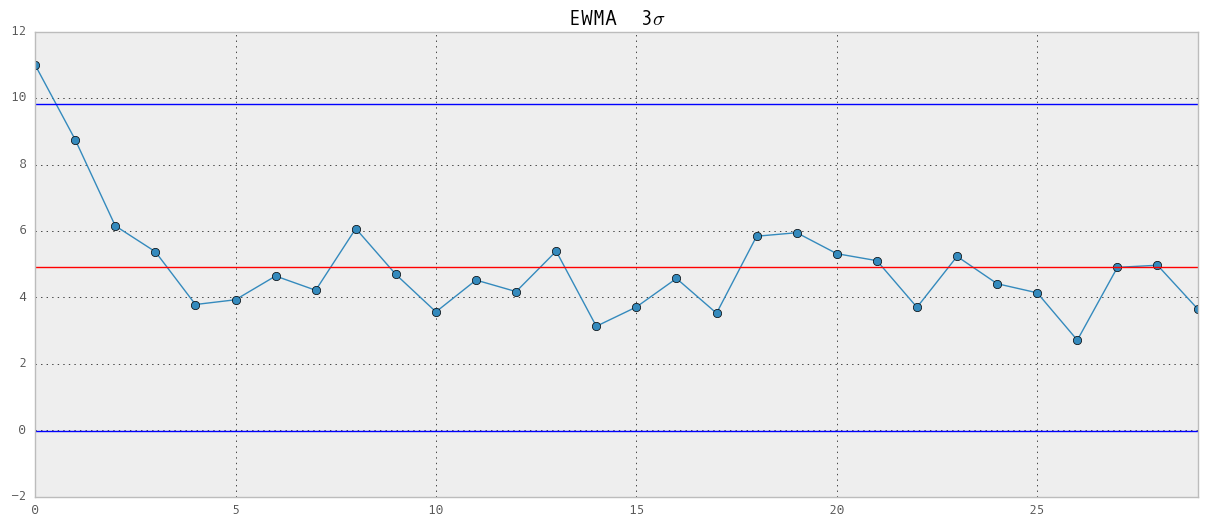

'/var/folders/b4/ls5nk2y13p1_ff7fb6n9t0m40000gn/T/tmprcsnuN_ewma.jpg'

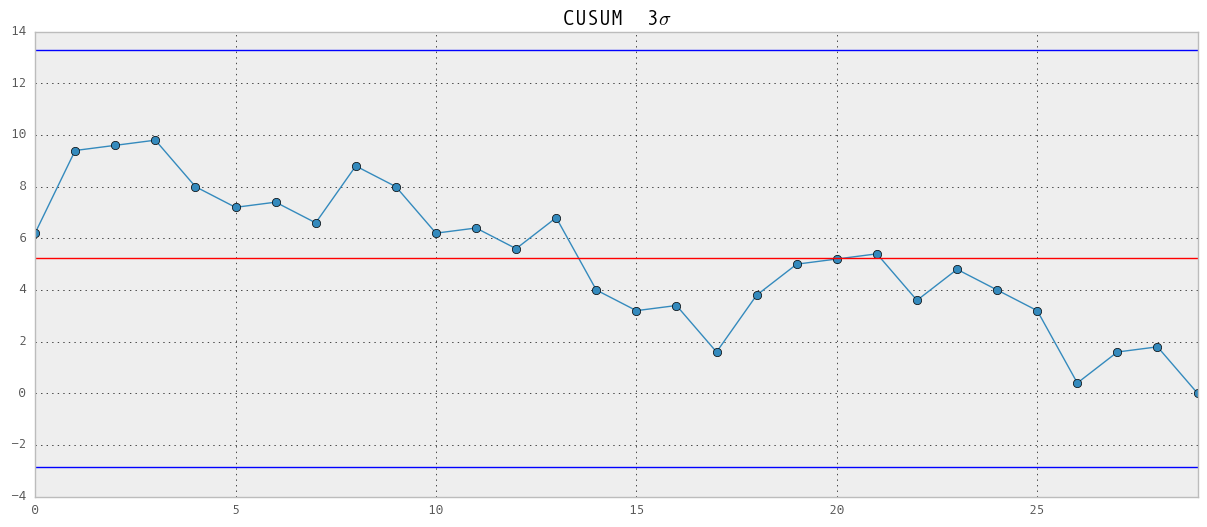